<a href="https://colab.research.google.com/github/Saarss-2211/projects/blob/main/HOUSE_PRICE_PRDICTION_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 First 5 rows:
   Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538  

🔹 Data Types:
Unnamed: 0      int64
Address        object
Zip            object
Price         float64
Area            int64
Room            int64
Lon           float64
Lat           float64
dtype: object

🔹 Missing Values:
Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
R

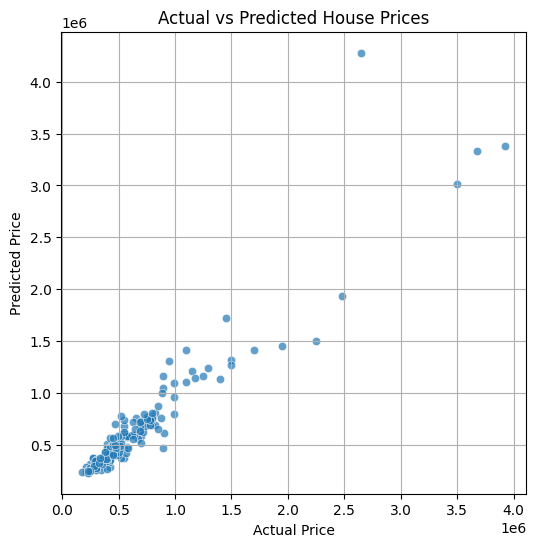

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the Dataset
df = pd.read_csv('/content/HousingPrices-Amsterdam.csv')

# Step 3: Preview the Data
print("🔹 First 5 rows:")
print(df.head())

print("\n🔹 Data Types:")
print(df.dtypes)

print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Step 4: Drop Unnecessary Columns
columns_to_drop = ['Address', 'Zip code', 'URL']  # Drop irrelevant columns if they exist
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Step 5: Handle Missing Values (drop for simplicity)
df = df.dropna()

# Step 6: Encode Categorical Features
categorical_columns = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 7: Define Features (X) and Target (y)
target_column = 'Price'  # This is what we're predicting
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 8: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Predict House Prices
y_pred = model.predict(X_test)

# Step 11: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Model Evaluation:")
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R² Score: {r2:.2f}")

# Step 12: Visualize Actual vs Predicted Prices
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
